# Lab 5: Wide & Deep Networks

Team: Miro Ronac, Kirk Watson, Brandon Vincitore

## $1.$ Dataset Preparation 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## $a.$ Defining and preparing class variables (1 pt)

#### We aim to utilize our dataset to predict level of diabetes in a patient, (e.g. no diabetes, prediabetes, diabetes). Each patient was asked 21 questions regarding his/her health, habits, education, and income history. Although we have the same data type (float64) for each of our features, based on the documentation on Kaggle, we do have 4 distinct categorical features:

#### $GenHlth, Age, Education, and Income.$

#### Each category is described as follows:

##### $Diabetes 012 - Diabetes Scale$

                            0 = No Diabetes

                            1 = Prediabetes
                            
                            2 = Diabetes


##### $GenHlth - General Health$

                            1 = Excellent
                            
                            2 = Very Good
                            
                            3 = Good
                            
                            4 = Fair
                            
                            5 = Poor

##### $Age - Age Category$

                            1 = 18 - 24 yrs
                            2 = 25 - 29 yrs
                            3 = 30 - 34 yrs
                            4 = 35 - 39 yrs
                            5 = 40 - 44 yrs
                            6 = 45 - 49 yrs
                            7 = 50 - 54 yrs
                            8 = 55 - 59 yrs
                            9 = 60 - 64 yrs
                            10 = 65 - 69 yrs
                            11 = 70 - 74 yrs
                            12 = 75 - 79 yrs
                            13 = 80 yrs or older

##### $Education - Education Level$

                            1 = Never attended school or only kindergarten
                            
                            2 = Grades 1 through 8 (Elementary)
                            
                            3 = Grades 9 through 11 (Some high school)
                            
                            4 = Grade 12 or GED (High school graduate)
                            
                            5 = College 1 year to 3 years (Some college or technical school)
                            
                            6 = College 4 years or more (College graduate)
                            
##### $Income - Income Scale$

                            1 = less than $10,000
                          
                            2 = less than $15,000, more than $10,000
                            
                            3 = less than $20,000, more than $15,000
                            
                            4 = less than $25,000, more than $20,000
                            
                            5 = less than $35,000, more than $25,000
                            
                            6 = less than $50,000, more than $35,000
                            
                            7 = less than $75,000, more than $75,000
                            
                            8 = more than $75,000

In [2]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
# ========================================================
from copy import deepcopy
df_target = deepcopy(df)
# ========================================================
df_target.drop(df_target.tail(244000).index,inplace = True) # lets keep the entire dataset for now

print(df_target.info())

#show df
pd.set_option('display.max_columns', None)
df_target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          9680 non-null   float64
 1   HighBP                9680 non-null   float64
 2   HighChol              9680 non-null   float64
 3   CholCheck             9680 non-null   float64
 4   BMI                   9680 non-null   float64
 5   Smoker                9680 non-null   float64
 6   Stroke                9680 non-null   float64
 7   HeartDiseaseorAttack  9680 non-null   float64
 8   PhysActivity          9680 non-null   float64
 9   Fruits                9680 non-null   float64
 10  Veggies               9680 non-null   float64
 11  HvyAlcoholConsump     9680 non-null   float64
 12  AnyHealthcare         9680 non-null   float64
 13  NoDocbcCost           9680 non-null   float64
 14  GenHlth               9680 non-null   float64
 15  MentHlth             

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9675,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,5.0,2.0
9676,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,6.0,7.0
9677,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
9678,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0,8.0


###### Checking for missing values

In [3]:
if df_target.isnull().sum().any() == False:
    print('There are no missing values')
else:
    print('There are missing values')

There are no missing values


###### Encoding categorical features, normalizing numerical variables, and converting binary variables to integers

In [4]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
# ========================================================
df_encode = deepcopy(df_target)
# ========================================================
# for every categorical variable, encode as integer
# Keras will use the integer variable to figure out how to one-hot encode    
encoders = dict() # save each encoder in dictionary
categorical_headers = ['Diabetes_012', 'GenHlth','Age','Education','Income']

for col in categorical_headers:
        encoders[col] = LabelEncoder() # save the encoder
        df_encode[col] = encoders[col].fit_transform(df_encode[col])
# ========================================================
# scale the numeric, continuous variables
numerical_headers = ["BMI", "MentHlth", "PhysHlth"]

for col in numerical_headers:
    ss = StandardScaler()
    df_encode[col] = ss.fit_transform(df_encode[col].values.reshape(-1,1))
# ========================================================
# converting binary variables to integers
binary_headers = ['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack',
                  'PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex',]
for col in binary_headers:
    df_encode[col] = df_encode[col].astype('int64')
    
print(df_encode.info())
df_encode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          9680 non-null   int64  
 1   HighBP                9680 non-null   int64  
 2   HighChol              9680 non-null   int64  
 3   CholCheck             9680 non-null   int64  
 4   BMI                   9680 non-null   float64
 5   Smoker                9680 non-null   int64  
 6   Stroke                9680 non-null   int64  
 7   HeartDiseaseorAttack  9680 non-null   int64  
 8   PhysActivity          9680 non-null   int64  
 9   Fruits                9680 non-null   int64  
 10  Veggies               9680 non-null   int64  
 11  HvyAlcoholConsump     9680 non-null   int64  
 12  AnyHealthcare         9680 non-null   int64  
 13  NoDocbcCost           9680 non-null   int64  
 14  GenHlth               9680 non-null   int64  
 15  MentHlth             

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,1.808058,1,0,0,0,0,1,0,1,0,4,1.854255,1.114609,1,0,8,3,2
1,0,0,0,0,-0.567220,1,0,0,1,0,0,0,0,1,2,-0.448694,-0.519375,0,0,6,5,0
2,0,1,1,1,-0.092165,0,0,0,0,1,0,0,1,1,4,3.389554,2.748593,1,0,8,3,7
3,0,1,0,1,-0.250517,0,0,0,1,1,1,0,1,0,1,-0.448694,-0.519375,0,0,10,2,5
4,0,1,1,1,-0.725572,0,0,0,1,1,1,0,1,0,1,-0.064870,-0.519375,0,0,10,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9675,0,0,0,1,0.066187,1,0,0,1,1,1,0,1,0,1,-0.448694,-0.519375,0,0,6,4,1
9676,0,0,0,1,-0.567220,0,0,0,1,1,1,0,1,0,1,-0.448694,-0.519375,0,0,5,5,6
9677,0,0,0,1,-0.567220,0,0,0,1,0,1,0,1,0,0,-0.448694,-0.519375,0,1,5,5,7
9678,0,0,0,1,-0.725572,0,0,0,1,1,0,0,1,0,1,-0.448694,-0.519375,0,1,3,5,7


#### As evident above, our integer encoded features are stored as int64 datatypes and our continuous numerical variables are stored as float64. Once again, we will be grappling with a multi-class classification problem. Since keras can one-hot encode on its own when given integer encoded variables, we simply integer encode the target column as we did with the other categorical features. This will also be useful in our data splitting method, since the method we intend to implement cannot work with one-hot encoded variables that produce multi-label indicator target types.

###### Defining features and target

In [5]:
target = ['Diabetes_012']
X = df_encode.drop(target, axis=1); y = df_encode.Diabetes_012

In [6]:
# Features
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                9680 non-null   int64  
 1   HighChol              9680 non-null   int64  
 2   CholCheck             9680 non-null   int64  
 3   BMI                   9680 non-null   float64
 4   Smoker                9680 non-null   int64  
 5   Stroke                9680 non-null   int64  
 6   HeartDiseaseorAttack  9680 non-null   int64  
 7   PhysActivity          9680 non-null   int64  
 8   Fruits                9680 non-null   int64  
 9   Veggies               9680 non-null   int64  
 10  HvyAlcoholConsump     9680 non-null   int64  
 11  AnyHealthcare         9680 non-null   int64  
 12  NoDocbcCost           9680 non-null   int64  
 13  GenHlth               9680 non-null   int64  
 14  MentHlth              9680 non-null   float64
 15  PhysHlth             

In [7]:
# Targets
from sklearn.utils.multiclass import type_of_target
print('For our classification task we have a total of: ', len(np.unique(y)), ' classes\n\nThus we have a ' + str(type_of_target(y)) + ' target.')
print(y)

For our classification task we have a total of:  3  classes

Thus we have a multiclass target.
0       0
1       0
2       0
3       0
4       0
       ..
9675    0
9676    0
9677    0
9678    0
9679    0
Name: Diabetes_012, Length: 9680, dtype: int64


## $b.$ Identifying cross-product features (1 pt)

#### To determine potential candidates for cross-product feature pairing, we decided to generate a correlation matrix that exhibits how well-correlated certain features are to one another in our dataset. 

<AxesSubplot:>

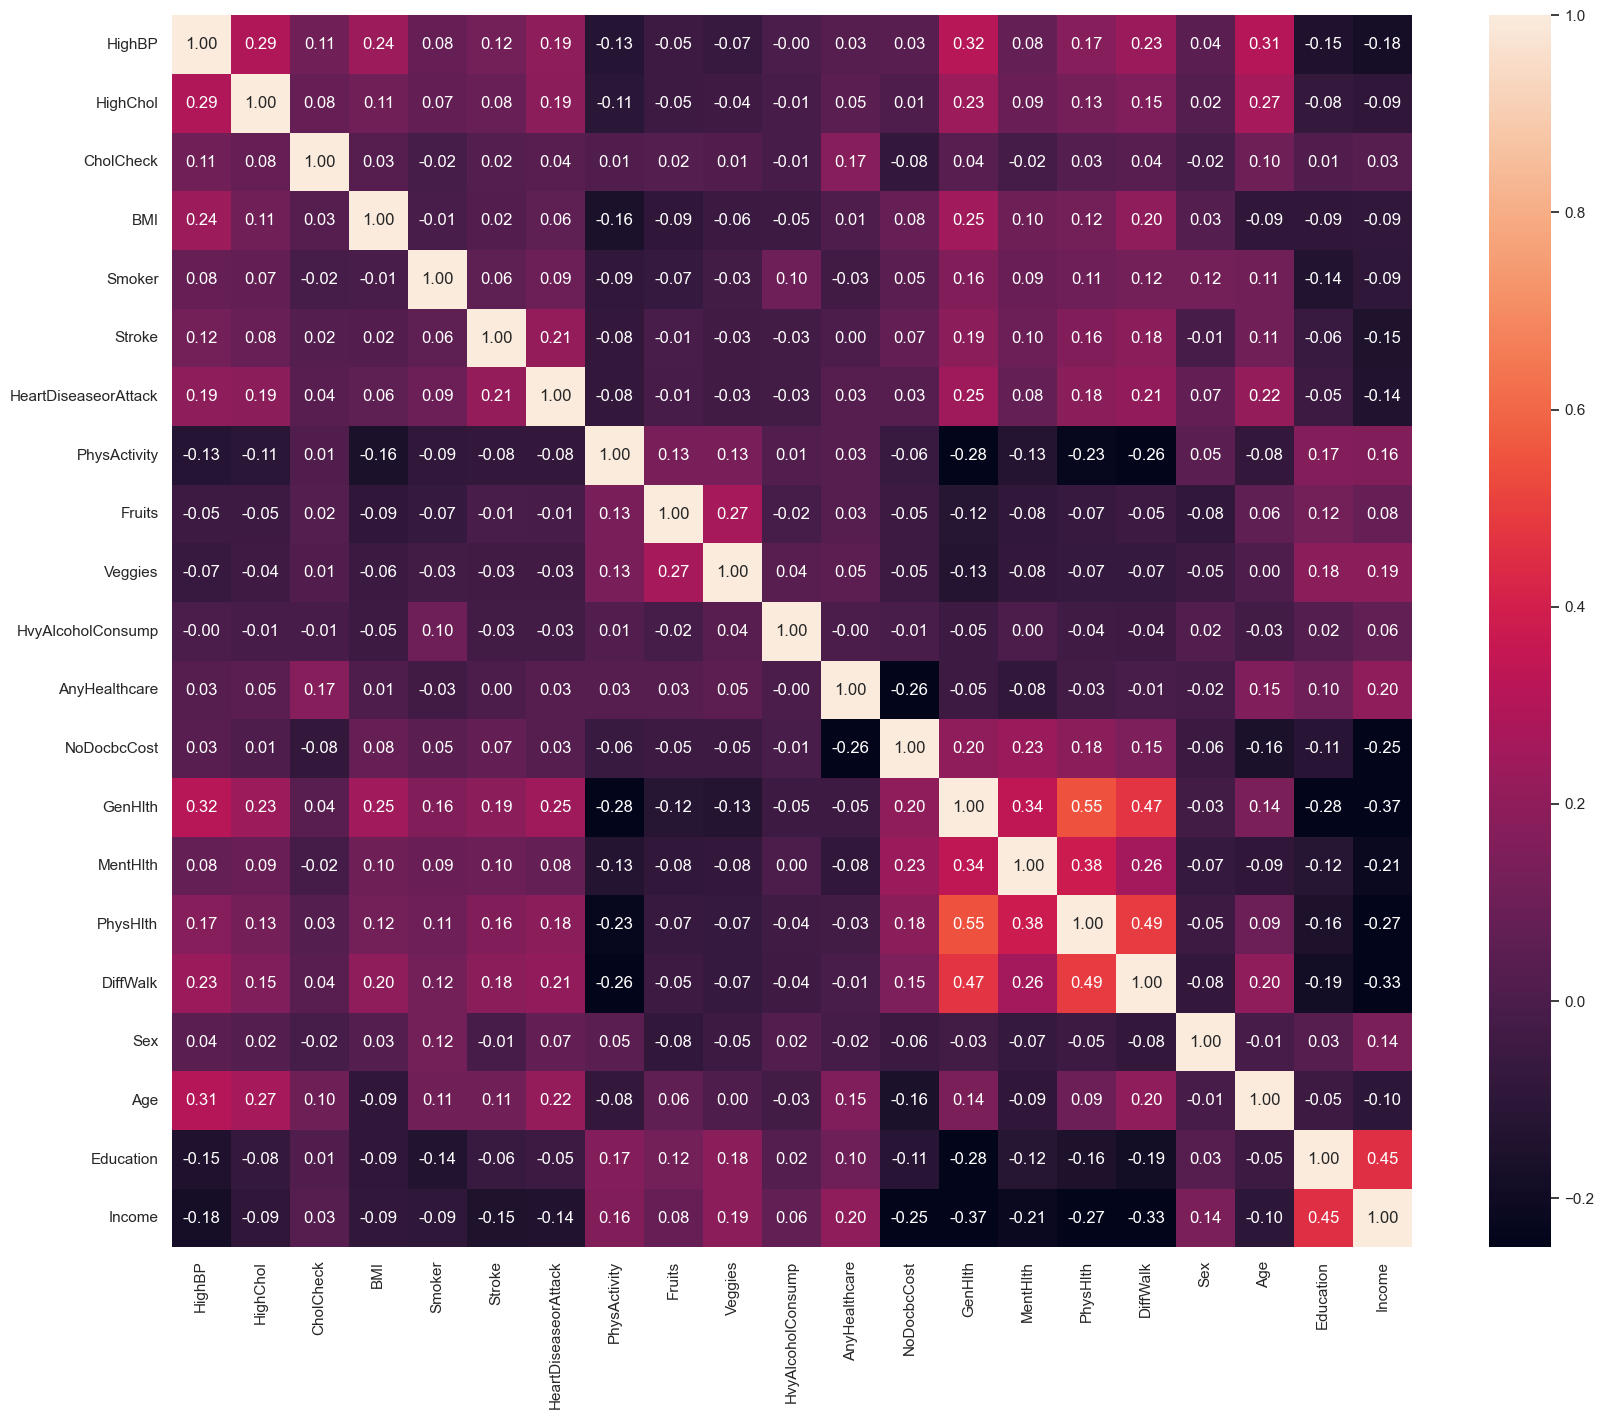

In [8]:
import seaborn as sns
 
cmap = sns.set(style="darkgrid") # one of the many styles to plot using

# f, ax = plt.subplots(figsize=(15, 15))
fig = plt.figure(figsize=(20,16))
sns.heatmap(X.corr(), cmap=cmap, annot=True, vmin=-0.25, vmax=1, fmt=".2f")

In [9]:
categorical_headers = ['GenHlth','Age','Education','Income']
for col in categorical_headers:
    vals = X[col].unique()
    print(col,'has', len(vals), 'unique values:')
    print(vals)

GenHlth has 5 unique values:
[4 2 1 3 0]
Age has 13 unique values:
[ 8  6 10  9  7 12  3  5  1 11  4  0  2]
Education has 6 unique values:
[3 5 2 4 1 0]
Income has 8 unique values:
[2 0 7 5 3 6 1 4]


In [10]:
%%time
cross_columns = [['Education','Income'],
                 ['Education', 'Income', 'Age'],
                 ['PhysHlth', 'DiffWalk'],
                 ['MentHlth', 'PhysHlth'],
                 ['GenHlth', 'DiffWalk'],
                 ['GenHlth', 'PhysHlth'],
                 ['GenHlth', 'PhysHlth', 'MentHlth'],
                 ['GenHlth', 'PhysHlth', 'DiffWalk']]

cross_col_df_names= []
for cols_list in cross_columns:
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed = X[cols_list].astype(str).agg('_'.join, axis=1)
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(cols_list)
    
    # 2. encode as integers, stacking all possibilities
    enc.fit(X_crossed)
    
    # 3. Save into dataframe with new name
    X[cross_col_name] = enc.transform(X_crossed)
    
    # keep track of the new names of the crossed columns
    cross_col_df_names.append(cross_col_name)

X.head()

CPU times: total: 391 ms
Wall time: 390 ms


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Education_Income,Education_Income_Age,PhysHlth_DiffWalk,MentHlth_PhysHlth,GenHlth_DiffWalk,GenHlth_PhysHlth,GenHlth_PhysHlth_MentHlth,GenHlth_PhysHlth_DiffWalk
0,1,1,1,1.808058,1,0,0,0,0,1,0,1,0,4,1.854255,1.114609,1,0,8,3,2,23,205,29,225,9,103,690,177
1,0,0,0,-0.567220,1,0,0,1,0,0,0,0,1,2,-0.448694,-0.519375,0,0,6,5,0,37,383,8,61,4,44,277,70
2,1,1,1,-0.092165,0,0,0,0,1,0,0,1,1,4,3.389554,2.748593,1,0,8,3,7,28,270,56,310,9,115,754,198
3,1,0,1,-0.250517,0,0,0,1,1,1,0,1,0,1,-0.448694,-0.519375,0,0,10,2,5,18,138,8,61,2,23,123,36
4,1,1,1,-0.725572,0,0,0,1,1,1,0,1,0,1,-0.064870,-0.519375,0,0,10,4,3,32,313,8,4,2,23,120,36


#### When determining which features to cross, we decided to set a correlation threshold of 0.35. This is an arbitrary metric implemented after analyzing the matrix. We concluded that MentHlth and PhyHlth should definitely be crossed due to one's affect on another and vice versa. Their correlation was 0.35, as a result this is what we chose as the threshold. We found 4 other pairs of features that surpassed this value (see above). Moreover, we chose to append Age to Education and Income because it is obvious that, as people get older, their education levels and income tend to increase. We also decided to append MentHlth to the GenHlth and PhysHlth pair because it surpasses the threshold mark with each of the aforementioned features. We followed the same approach with DiffWalk.

## $c.$ Choosing evaluation metric (1 pt)

#### To determine the type of evaluation metric to implement we will quantify the class imbalance in our target feature Diabetes_012.

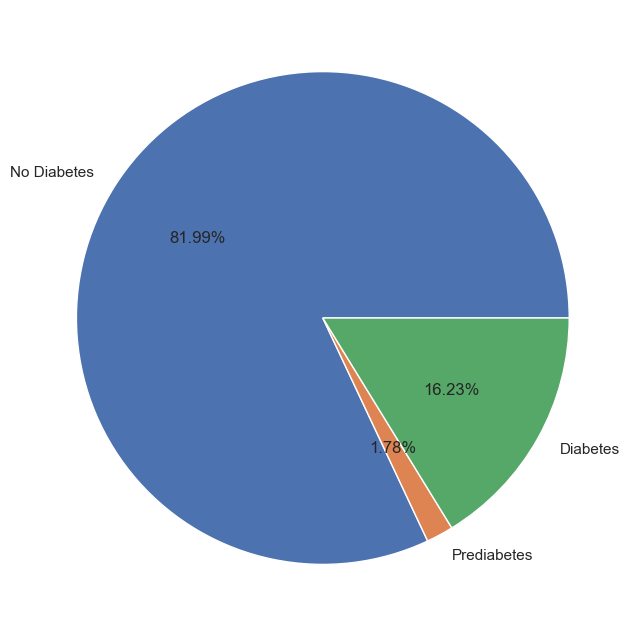

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
plt.pie(np.bincount(y), labels=['No Diabetes', 'Prediabetes', 'Diabetes'], autopct='%.2f%%')
plt.show()

#### We conclude that we are dealing with a relatively large class imbalance. As a result, we decided to implement the F1-score evaluation metric. The class imbalance is a problem for other evaluation metrics such as accuracy because, on any random guess the model would still be correct most of the time (84% of the time in our case). This metric is also essential for the task at hand in any deployment of this model because, based on the World Health Organization (WHO), in 2014 8.4% of adults aged 18 years or older were diagnosed with diabetes. As a result, any survey that collects responses from a random grouping of people will tend to lean toward this imbalance in their responses as well. Therefore, consistently generating datasets that would be characterized by dramatic class imbalances. Interestingly, we actually see a slightly higher percentage in those who have been diagnosed with diabetes in our respective dataset. The responses for the survey used to produce this dataset were from the year 2015 and the respondents were randomly chosen. 

## $d.$ Choosing method to split data into test and training sets (1 pt)

Size of training set for each class:  [6350  137 1257] and for test set is:  [1587   35  314]


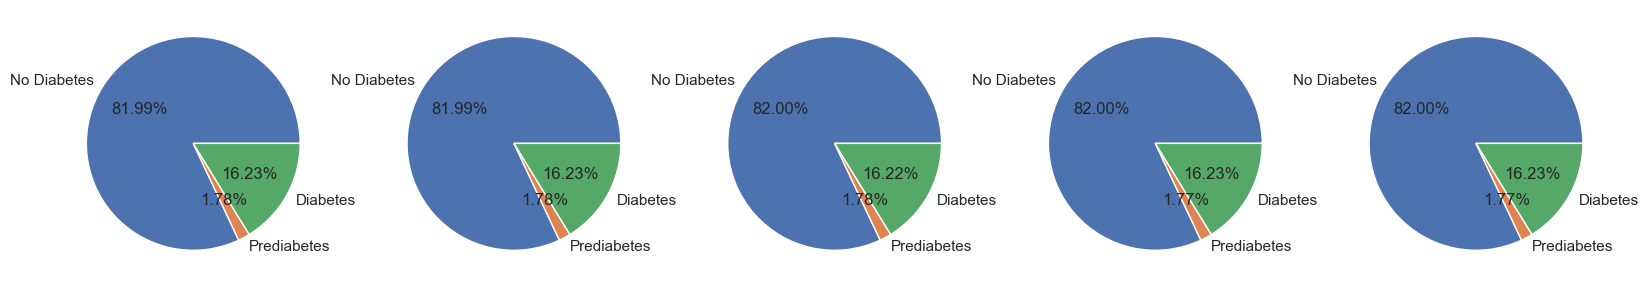

In [12]:
from sklearn.model_selection import StratifiedKFold
K = 5
skfold = StratifiedKFold(n_splits=K, random_state=1, shuffle=True)

fig = plt.figure(figsize=(20, 8))

i = 1
for train_idx, test_idx in skfold.split(X, y):
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    ax = fig.add_subplot(1,K,i)
    plt.pie(np.bincount(y_train), labels=['No Diabetes', 'Prediabetes', 'Diabetes'], autopct='%.2f%%')
    i += 1
print('Size of training set for each class: ', np.bincount(y_train), 'and for test set is: ', np.bincount(y_test))

#### To split our dataset, we chose to implement a stratified K-fold approach due to the inherent class imbalance. Also, due to how large our dataset is, we concluded that a 80/20 split would suffice between our training and test set, therefore we decided to utilize 5 folds. As seen above, we have mitigated the predicaments otherwise evident in randomly splitting the data insofar that we maintain the ratio between our multi-class features seen in the complete dataset (i.e., the ratio between No Diabetes/Diabetes, PreDiabetes/No Diabetes, and Prediabetes/Diabetes within each fold is the same as what we see in the original dataset -- See "Choosing evaluation metric").

# $2.$ Modeling

## $a.$ Creating three combined wide and deep networks (2 pts)

In [13]:
#TODO - make working changes to model.compile
#TODO - describe first model
#TODO - for second model, add more dense layers for wide etc
#TODO - for third model, add more dense layers for deep etc

#QUESTION - do we include binary features as categorical?
#QUESTION - this is not binary classifier, so which optimizer and loss do we use? "categorical_crossentropy" doesn't work

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Input, Embedding, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

# F1-score is no longer supported in keras so we must make a F1-score function
# From https://aakashgoel12.medium.com/how-to-add-user-defined-function-get-f1-score-in-keras-metrics-3013f979ce0d

def f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

### Create first deep and wide network

Fold 1 - Loss: -42.7896728515625 F1-Score: 0.4624173641204834


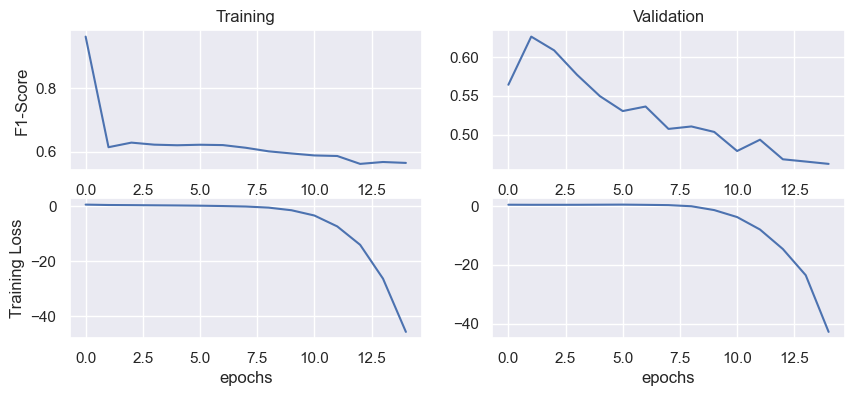

Fold 2 - Loss: 0.3998582065105438 F1-Score: 0.5015367865562439


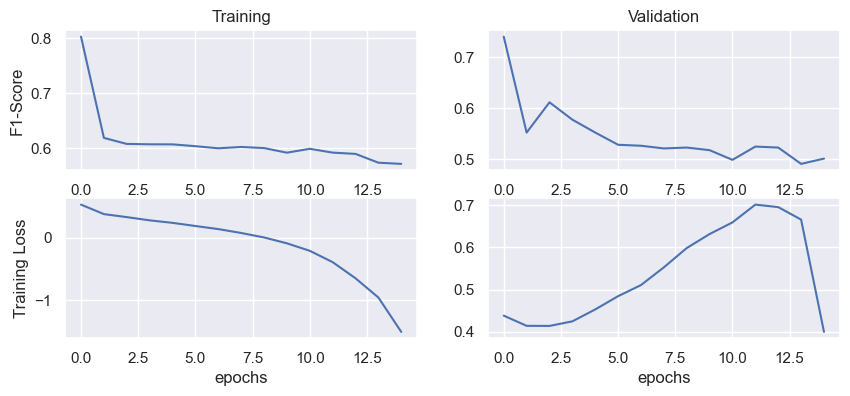

Fold 3 - Loss: 0.5308284163475037 F1-Score: 0.4466710388660431


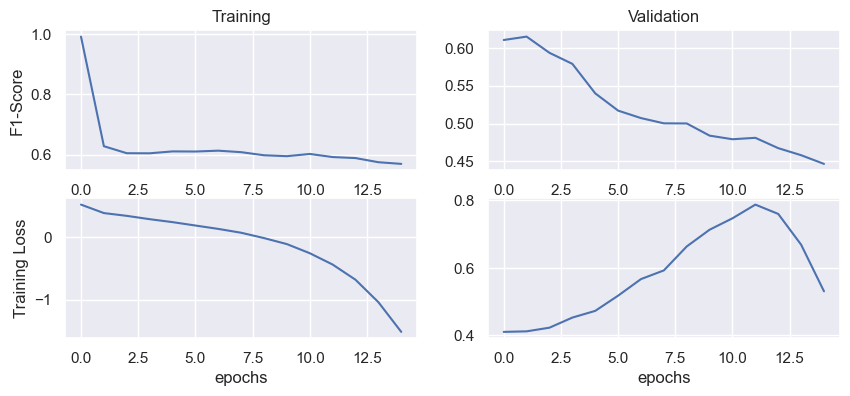

Fold 4 - Loss: -2.1538662910461426 F1-Score: 0.4627847373485565


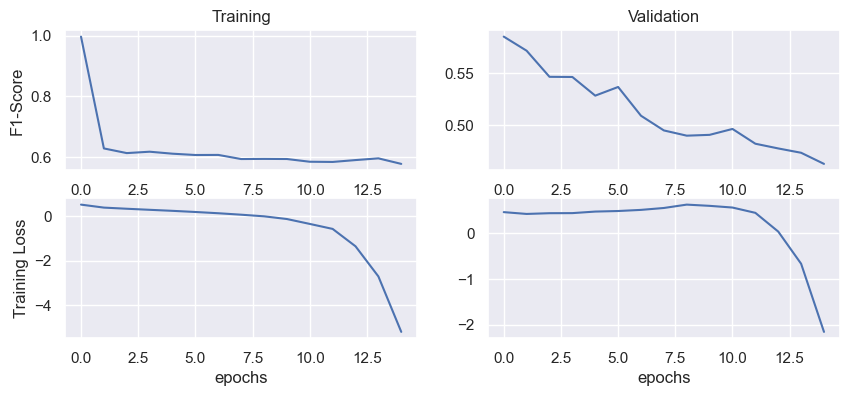

Fold 5 - Loss: -3.1473538875579834 F1-Score: 0.45896777510643005


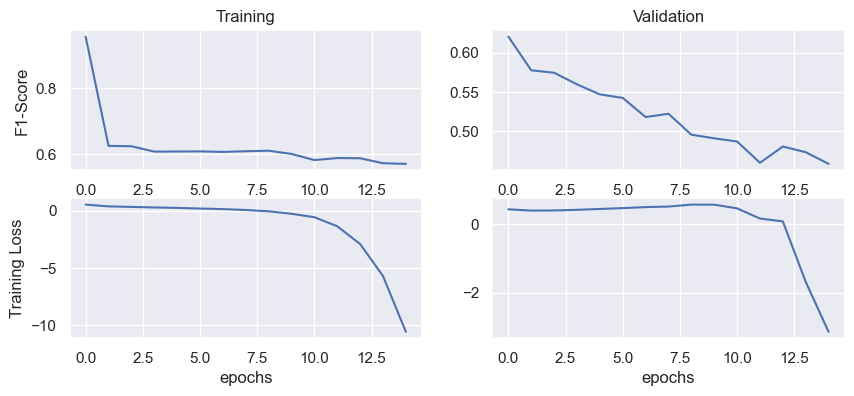

In [15]:
# Adapted from https://github.com/eclarson/MachineLearningNotebooks/blob/master/10.%20Keras%20Wide%20and%20Deep.ipynb

categorical_headers = list(X.select_dtypes(include='int64').columns)

fold_count=1
f1_average1=0
loss_average1=0

#loop through each fold
for train_idx, test_idx in skfold.split(X, y):
    
    #get train and test sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx].to_numpy(), y.iloc[test_idx].to_numpy()
    
    # get crossed columns
    X_train_crossed = X_train[cross_col_df_names].to_numpy()
    X_test_crossed = X_test[cross_col_df_names].to_numpy()
    
    # save categorical features
    X_train_cat = X_train[categorical_headers].to_numpy() 
    X_test_cat = X_test[categorical_headers].to_numpy() 
    
    # and save off the numeric features
    X_train_num =  X_train[numerical_headers].to_numpy()
    X_test_num = X_test[numerical_headers].to_numpy()
    
    #we need to create separate lists for each branch
    crossed_outputs = []

    #CROSSED DATA INPUT
    input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
    for idx, col in enumerate(cross_col_df_names):
        
        #track what the maximum integer value will be for this variable
        #which is the same as the number of categories
        N = max(X_train[col].max(), X_test[col].max()) + 1
        N_reduced = int(np.sqrt(N))
        
        #this line of code does this: input_branch[:,idx]
        x = tf.gather(input_crossed, idx, axis=1)
        
        #now use an embedding to deal with integers as if they were one hot encoded
        x = Embedding(input_dim=N, 
                      output_dim=N_reduced,
                      input_length=1, name=col+'_embed')(x)
        
        #save these outputs to concatenate later
        crossed_outputs.append(x)
    
    #now concatenate the outputs and add a fully connected layer
    wide_branch = concatenate(crossed_outputs, name='wide_concat')
    
    #reset this input branch
    all_deep_branch_outputs = []
    
    #CATEGORICAL DATA INPUT
    input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
    for idx, col in enumerate(categorical_headers):
        
        #track what the maximum integer value will be for this variable
        #which is the same as the number of categories
        N = max(X_train[col].max(), X_test[col].max()) + 1
        N_reduced = int(np.sqrt(N))
        
        #this line of code does this: input_branch[:,idx]
        x = tf.gather(input_cat, idx, axis=1)
        
        #now use an embedding to deal with integers as if they were one hot encoded
        x = Embedding(input_dim=N,
                      output_dim=N_reduced,
                      input_length=1, name=col+'_embed')(x)
        
        #save these outputs to concatenate later
        all_deep_branch_outputs.append(x)
    
    #NUMERIC DATA INPUT
    #create dense input branch for numeric
    input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
    x_dense = Dense(units=20, activation='relu', name='num_1')(input_num)
    
    all_deep_branch_outputs.append(x_dense)
    
    #merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs, name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
    #merge the deep and wide branch
    final_branch = concatenate([wide_branch, deep_branch], name='concat_deep_wide')
    final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)
    
    model = Model(inputs=[input_crossed,input_cat,input_num], outputs=final_branch)

    model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=[f1])
    
    history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                         y_train,
                         epochs=15,
                         batch_size=32,
                         verbose=0,
                         validation_data=([X_test_crossed,X_test_cat,X_test_num],y_test))
    
    loss, f1_score = model.evaluate([X_test_crossed,X_test_cat,X_test_num], y_test, verbose=0)
    
    print(f'Fold {fold_count} - Loss: {loss} F1-Score: {f1_score}')
    fold_count+=1
    f1_average1+=f1_score
    loss_average1+=loss
    
    %matplotlib inline
    
    plt.figure(figsize=(10,4))
    plt.subplot(2,2,1)
    plt.plot(history.history['f1'])
    
    plt.ylabel('F1-Score')
    plt.title('Training')
    plt.subplot(2,2,2)
    plt.plot(history.history['val_f1'])
    plt.title('Validation')

    plt.subplot(2,2,3)
    plt.plot(history.history['loss'])
    plt.ylabel('Training Loss')
    plt.xlabel('epochs')
    
    plt.subplot(2,2,4)
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs')
    plt.show()

### Recreate wide and deep network by adding deep layers and a dropout layer

Fold 1 - Loss: -2.544149398803711 F1-Score: 0.45917701721191406


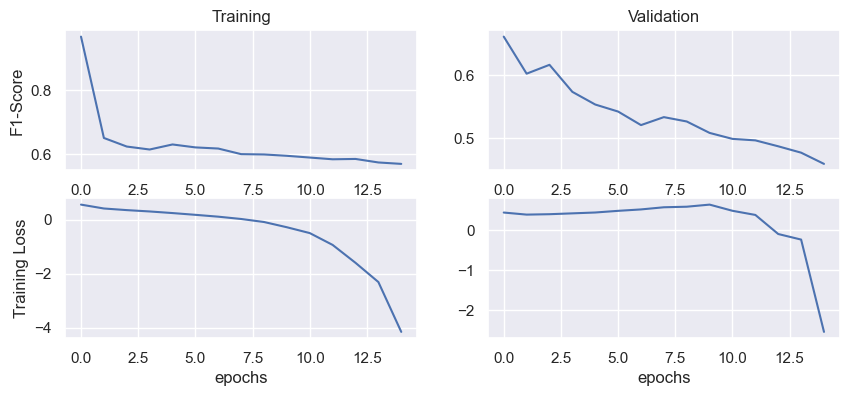

Fold 2 - Loss: -28.01767921447754 F1-Score: 0.45119407773017883


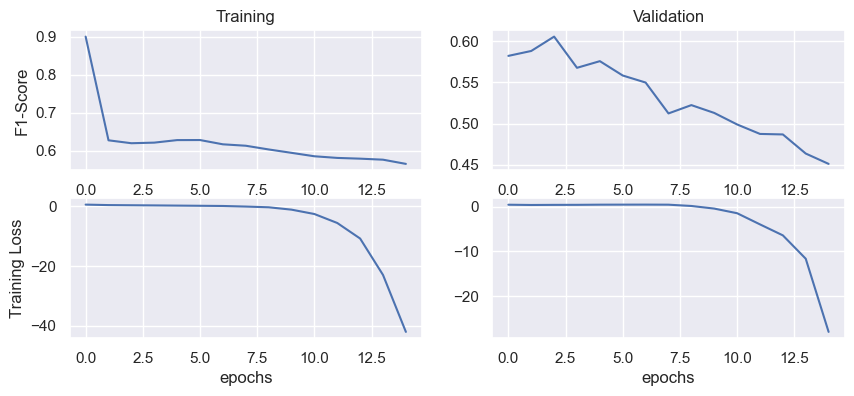

Fold 3 - Loss: -1.6128978729248047 F1-Score: 0.4610276520252228


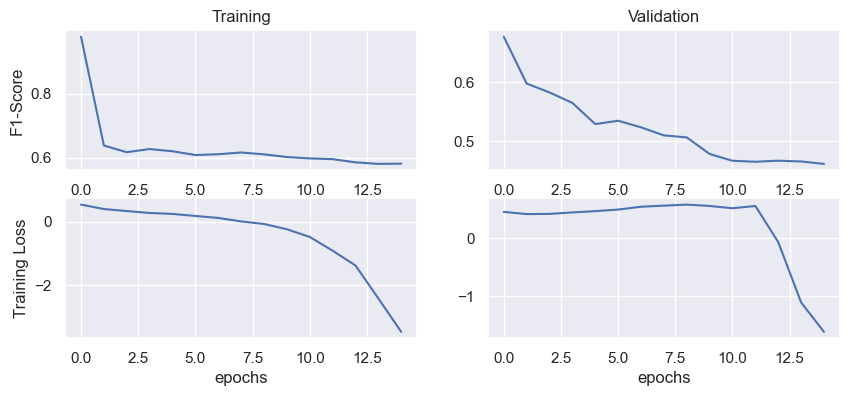

Fold 4 - Loss: -15.980945587158203 F1-Score: 0.4438098073005676


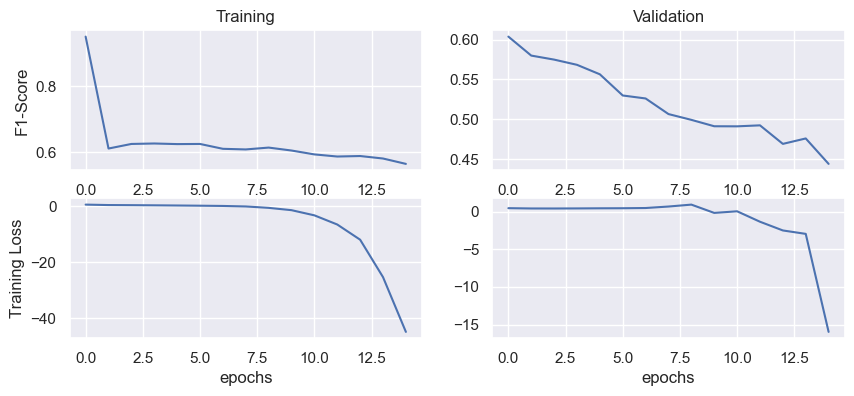

Fold 5 - Loss: -0.38399189710617065 F1-Score: 0.4513547718524933


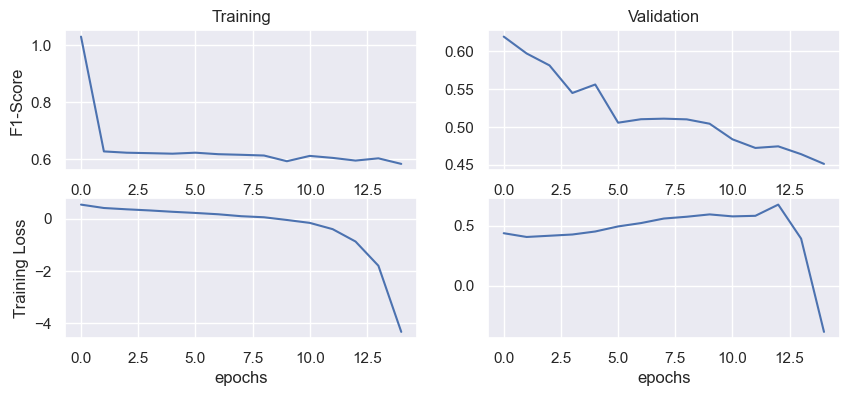

In [16]:
# Adapted from https://github.com/eclarson/MachineLearningNotebooks/blob/master/10.%20Keras%20Wide%20and%20Deep.ipynb

fold_count=1
f1_average2=0
loss_average2=0

#loop through each fold
for train_idx, test_idx in skfold.split(X, y):
    
    #get train and test sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx].to_numpy(), y.iloc[test_idx].to_numpy()
    
    # get crossed columns
    X_train_crossed = X_train[cross_col_df_names].to_numpy()
    X_test_crossed = X_test[cross_col_df_names].to_numpy()
    
    # save categorical features
    X_train_cat = X_train[categorical_headers].to_numpy() 
    X_test_cat = X_test[categorical_headers].to_numpy() 
    
    # and save off the numeric features
    X_train_num =  X_train[numerical_headers].to_numpy()
    X_test_num = X_test[numerical_headers].to_numpy()
    
    #we need to create separate lists for each branch
    crossed_outputs = []

    #CROSSED DATA INPUT
    input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
    for idx, col in enumerate(cross_col_df_names):
        
        #track what the maximum integer value will be for this variable
        #which is the same as the number of categories
        N = max(X_train[col].max(), X_test[col].max()) + 1
        N_reduced = int(np.sqrt(N))
        
        #this line of code does this: input_branch[:,idx]
        x = tf.gather(input_crossed, idx, axis=1)
        
        #now use an embedding to deal with integers as if they were one hot encoded
        x = Embedding(input_dim=N, 
                      output_dim=N_reduced,
                      input_length=1, name=col+'_embed')(x)
        
        #save these outputs to concatenate later
        crossed_outputs.append(x)
    
    #now concatenate the outputs and add a fully connected layer
    wide_branch = concatenate(crossed_outputs, name='wide_concat')
    
    #reset this input branch
    all_deep_branch_outputs = []
    
    #CATEGORICAL DATA INPUT
    input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
    for idx, col in enumerate(categorical_headers):
        
        #track what the maximum integer value will be for this variable
        #which is the same as the number of categories
        N = max(X_train[col].max(), X_test[col].max()) + 1
        N_reduced = int(np.sqrt(N))
        
        #this line of code does this: input_branch[:,idx]
        x = tf.gather(input_cat, idx, axis=1)
        
        #now use an embedding to deal with integers as if they were one hot encoded
        x = Embedding(input_dim=N,
                      output_dim=N_reduced,
                      input_length=1, name=col+'_embed')(x)
        
        #save these outputs to concatenate later
        all_deep_branch_outputs.append(x)
    
    #NUMERIC DATA INPUT
    #create dense input branch for numeric
    input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
    x_dense = Dense(units=50, activation='relu', name='num_1')(input_num)
    x_dense = Dense(units=25, activation='relu', name='num_2')(x_dense)
    
    all_deep_branch_outputs.append(x_dense)
    
    #merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs, name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dropout(0.35)(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
    #merge the deep and wide branch
    final_branch = concatenate([wide_branch, deep_branch], name='concat_deep_wide')
    final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)
    
    model = Model(inputs=[input_crossed,input_cat,input_num], outputs=final_branch)

    model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=[f1])
    
    history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                         y_train,
                         epochs=15,
                         batch_size=32,
                         verbose=0,
                         validation_data=([X_test_crossed,X_test_cat,X_test_num],y_test))
    
    loss, f1_score = model.evaluate([X_test_crossed,X_test_cat,X_test_num], y_test, verbose=0)
    
    print(f'Fold {fold_count} - Loss: {loss} F1-Score: {f1_score}')
    fold_count+=1
    f1_average2+=f1_score
    loss_average2+=loss
    
    %matplotlib inline
    
    plt.figure(figsize=(10,4))
    plt.subplot(2,2,1)
    plt.plot(history.history['f1'])
    
    plt.ylabel('F1-Score')
    plt.title('Training')
    plt.subplot(2,2,2)
    plt.plot(history.history['val_f1'])
    plt.title('Validation')

    plt.subplot(2,2,3)
    plt.plot(history.history['loss'])
    plt.ylabel('Training Loss')
    plt.xlabel('epochs')
    
    plt.subplot(2,2,4)
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs')
    plt.show()

### Recreate wide and deep network by adding a dense layer to the wide branch

Fold 1 - Loss: 27.945146560668945 F1-Score: 0.42540091276168823


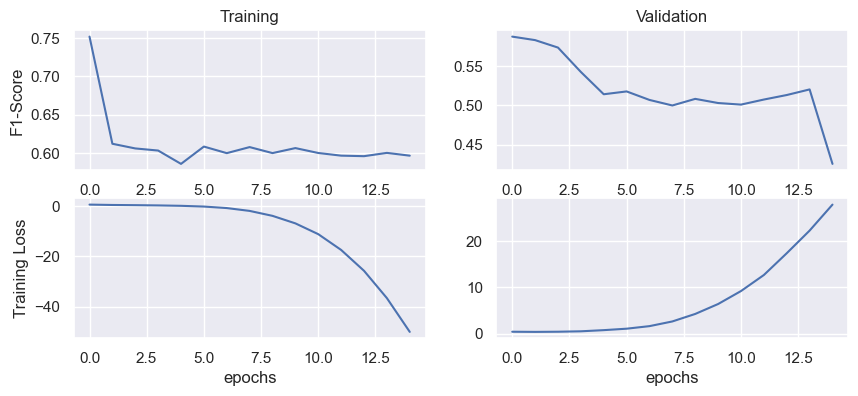

Fold 2 - Loss: 24.58011245727539 F1-Score: 0.46583327651023865


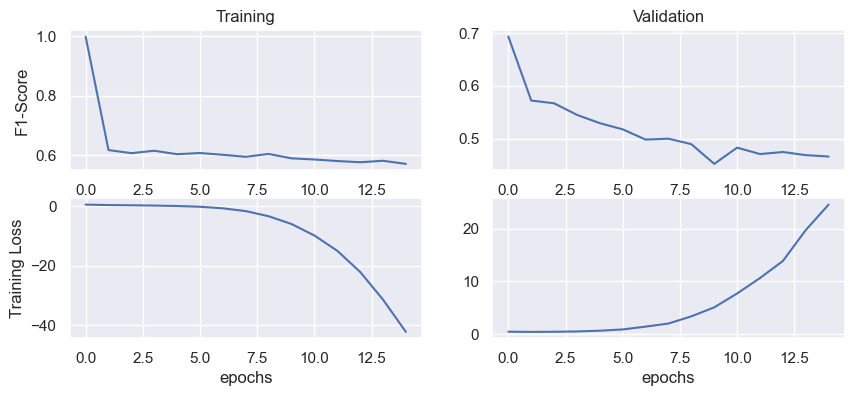

Fold 3 - Loss: 32.699527740478516 F1-Score: 0.4744948744773865


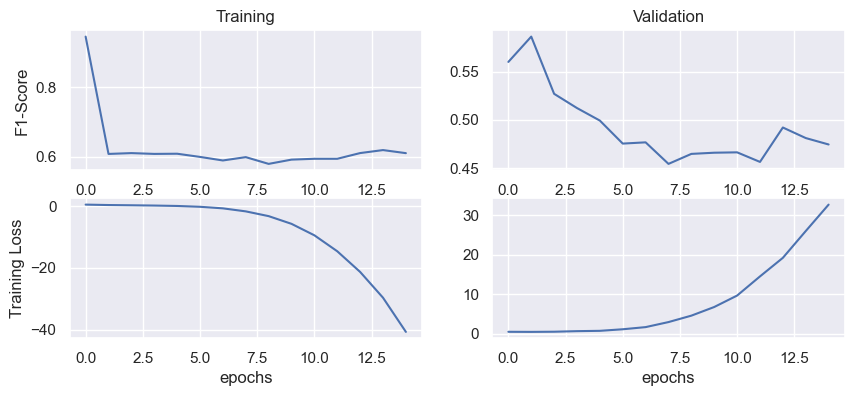

Fold 4 - Loss: 4.948929786682129 F1-Score: 0.4097658097743988


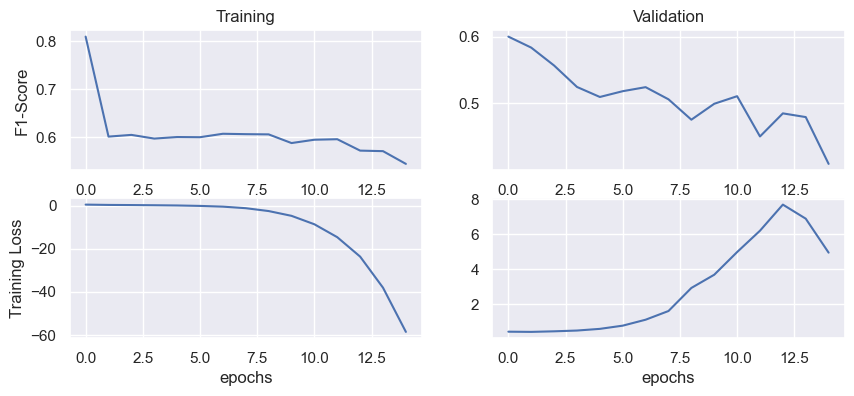

Fold 5 - Loss: 14.6497163772583 F1-Score: 0.4038815498352051


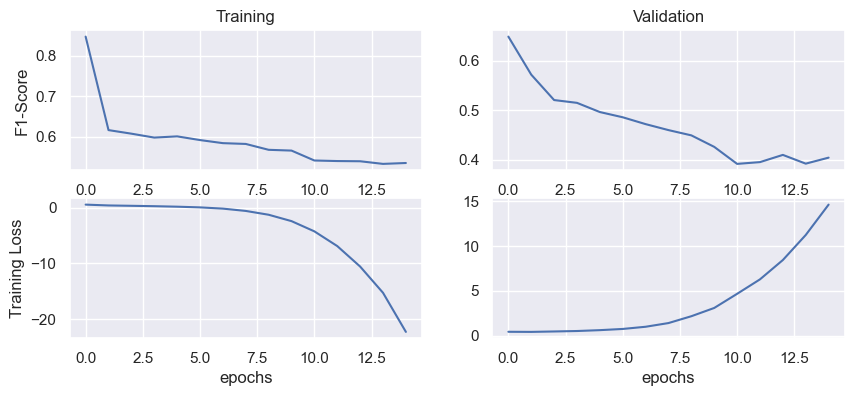

Average loss: 20.964686584472656
Average F1-Score: 0.43587528467178344


In [17]:
# Adapted from https://github.com/eclarson/MachineLearningNotebooks/blob/master/10.%20Keras%20Wide%20and%20Deep.ipynb

categorical_headers = list(X.select_dtypes(include='int64').columns)

fold_count=1
f1_average3=0
loss_average3=0

#loop through each fold
for train_idx, test_idx in skfold.split(X, y):
    
    #get train and test sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx].to_numpy(), y.iloc[test_idx].to_numpy()
    
    # get crossed columns
    X_train_crossed = X_train[cross_col_df_names].to_numpy()
    X_test_crossed = X_test[cross_col_df_names].to_numpy()
    
    # save categorical features
    X_train_cat = X_train[categorical_headers].to_numpy() 
    X_test_cat = X_test[categorical_headers].to_numpy() 
    
    # and save off the numeric features
    X_train_num =  X_train[numerical_headers].to_numpy()
    X_test_num = X_test[numerical_headers].to_numpy()
    
    #we need to create separate lists for each branch
    crossed_outputs = []

    #CROSSED DATA INPUT
    input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
    for idx, col in enumerate(cross_col_df_names):
        
        #track what the maximum integer value will be for this variable
        #which is the same as the number of categories
        N = max(X_train[col].max(), X_test[col].max()) + 1
        N_reduced = int(np.sqrt(N))
        
        #this line of code does this: input_branch[:,idx]
        x = tf.gather(input_crossed, idx, axis=1)
        
        #now use an embedding to deal with integers as if they were one hot encoded
        x = Embedding(input_dim=N, 
                      output_dim=N_reduced,
                      input_length=1, name=col+'_embed')(x)
        
        #save these outputs to concatenate later
        crossed_outputs.append(x)
    
    #now concatenate the outputs and add a fully connected layer
    wide_branch = concatenate(crossed_outputs, name='wide_concat')
    wide_branch = Dense(units=25, activation='relu', name='wide_1')(wide_branch)
    
    #reset this input branch
    all_deep_branch_outputs = []
    
    #CATEGORICAL DATA INPUT
    input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
    for idx, col in enumerate(categorical_headers):
        
        #track what the maximum integer value will be for this variable
        #which is the same as the number of categories
        N = max(X_train[col].max(), X_test[col].max()) + 1
        N_reduced = int(np.sqrt(N))
        
        #this line of code does this: input_branch[:,idx]
        x = tf.gather(input_cat, idx, axis=1)
        
        #now use an embedding to deal with integers as if they were one hot encoded
        x = Embedding(input_dim=N,
                      output_dim=N_reduced,
                      input_length=1, name=col+'_embed')(x)
        
        #save these outputs to concatenate later
        all_deep_branch_outputs.append(x)
    
    #NUMERIC DATA INPUT
    #create dense input branch for numeric
    input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
    x_dense = Dense(units=20, activation='relu', name='num_1')(input_num)
    
    all_deep_branch_outputs.append(x_dense)
    
    #merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs, name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
    #merge the deep and wide branch
    final_branch = concatenate([wide_branch, deep_branch], name='concat_deep_wide')
    final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)
    
    model = Model(inputs=[input_crossed,input_cat,input_num], outputs=final_branch)

    model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=[f1])
    
    history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                         y_train,
                         epochs=15,
                         batch_size=32,
                         verbose=0,
                         validation_data=([X_test_crossed,X_test_cat,X_test_num],y_test))
    
    loss, f1_score = model.evaluate([X_test_crossed,X_test_cat,X_test_num], y_test, verbose=0)
    
    print(f'Fold {fold_count} - Loss: {loss} F1-Score: {f1_score}')
    fold_count+=1
    f1_average3+=f1_score
    loss_average3+=loss
    
    %matplotlib inline
    
    plt.figure(figsize=(10,4))
    plt.subplot(2,2,1)
    plt.plot(history.history['f1'])
    
    plt.ylabel('F1-Score')
    plt.title('Training')
    plt.subplot(2,2,2)
    plt.plot(history.history['val_f1'])
    plt.title('Validation')

    plt.subplot(2,2,3)
    plt.plot(history.history['loss'])
    plt.ylabel('Training Loss')
    plt.xlabel('epochs')
    
    plt.subplot(2,2,4)
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs')
    plt.show()
    
print(f'Average loss: {loss_average3/5}')
print(f'Average F1-Score: {f1_average3/5}')

## $b.$ Investigating generalization performance (2 pts)

In [18]:
print('Original Deep and Wide Network')
print(f'Average loss: {loss_average1/5}')
print(f'Average F1-Score: {f1_average1/5}')
print('\nDeep and Wide Network with more layers and dropout layer')
print(f'Average loss: {loss_average2/5}')
print(f'Average F1-Score: {f1_average2/5}')
print('\nDeep and Wide Network with dense layers in wide branch')
print(f'Average loss: {loss_average3/5}')
print(f'Average F1-Score: {f1_average3/5}')

Original Deep and Wide Network
Average loss: -9.432041281461716
Average F1-Score: 0.4664755403995514

Deep and Wide Network with more layers and dropout layer
Average loss: -9.707932794094086
Average F1-Score: 0.4533126652240753

Deep and Wide Network with dense layers in wide branch
Average loss: 20.964686584472656
Average F1-Score: 0.43587528467178344


In our second wide and deep network, we added an extra layer to the numeric input branch and added an extra dense and dropout layer to the deep branch. This network slightly outperformed the original wide and deep network with a higher average F1-score and lower average loss as shown above. Adding a dense layer to the wide branch lowered the performance of the third network as compared to the original.

While we can see how each wide and deep network differs in performance, these results are not ideal. We are looking for the F1-score to increase and our loss to decrease as we have more epochs. These weak results could be due to parameters used to compile the model.

## $c.$ Comparing wide and deep network to MLP using AUC (1 pt)

Fold 1 - Loss: -12.207193374633789 AUC: 0.707231342792511


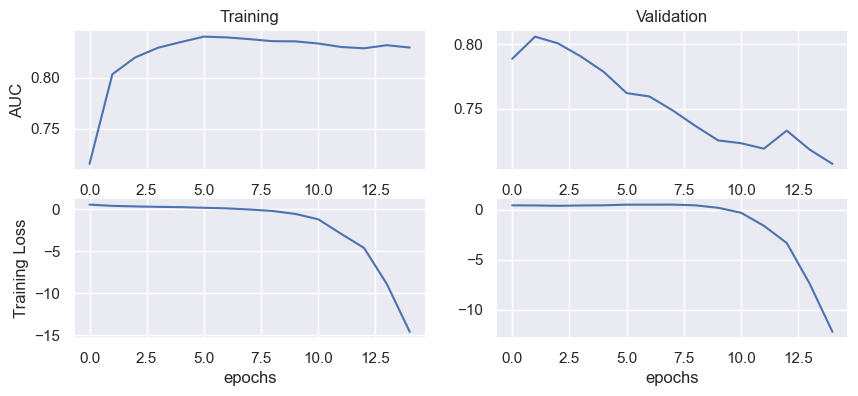

Fold 2 - Loss: -8.192279815673828 AUC: 0.7354956269264221


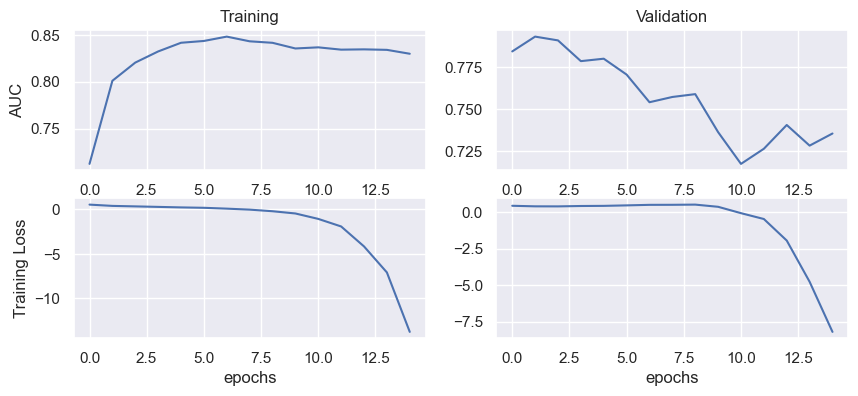

Fold 3 - Loss: -0.6557904481887817 AUC: 0.7019461393356323


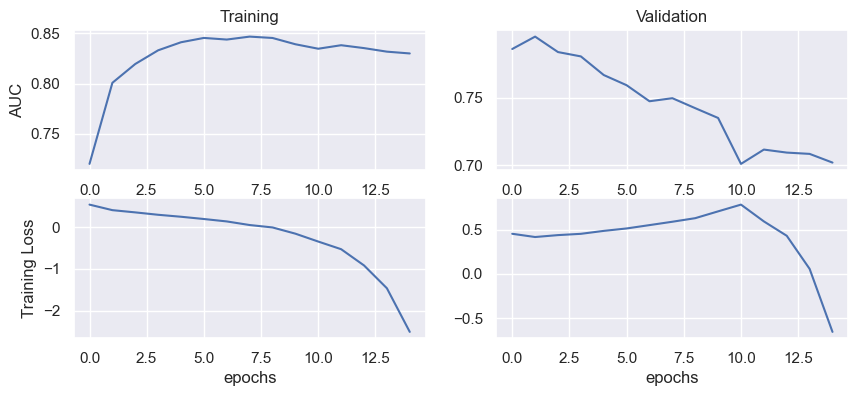

Fold 4 - Loss: -2.190706729888916 AUC: 0.737250030040741


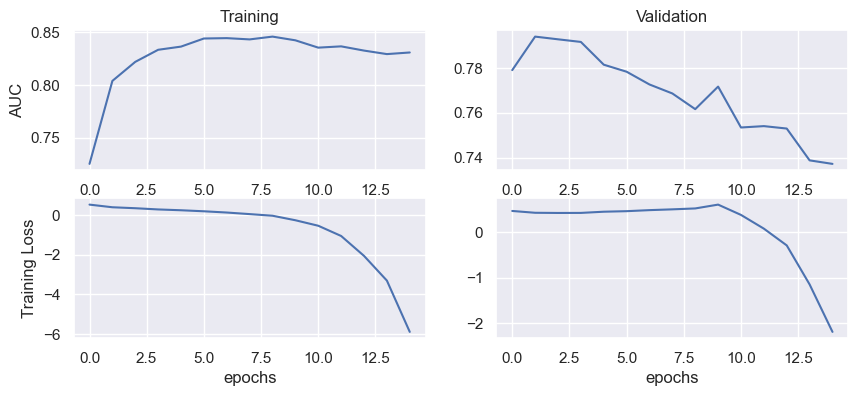

Fold 5 - Loss: -1.5330803394317627 AUC: 0.7198277711868286


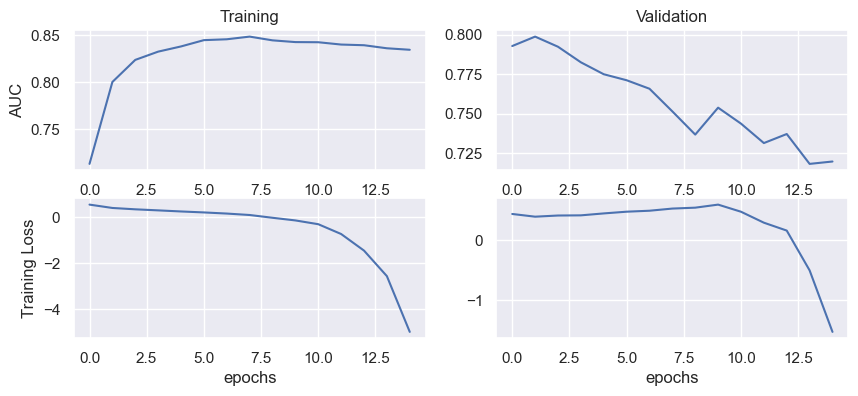

Deep and wide network
Average loss: -4.955810141563416
Average AUC: 0.720350182056427


In [20]:
# Adapted from https://github.com/eclarson/MachineLearningNotebooks/blob/master/10.%20Keras%20Wide%20and%20Deep.ipynb

fold_count=1
auc_count =1
auc_average2=0
loss_average2=0

#loop through each fold
for train_idx, test_idx in skfold.split(X, y):
    
    #get train and test sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx].to_numpy(), y.iloc[test_idx].to_numpy()
    
    # get crossed columns
    X_train_crossed = X_train[cross_col_df_names].to_numpy()
    X_test_crossed = X_test[cross_col_df_names].to_numpy()
    
    # save categorical features
    X_train_cat = X_train[categorical_headers].to_numpy() 
    X_test_cat = X_test[categorical_headers].to_numpy() 
    
    # and save off the numeric features
    X_train_num =  X_train[numerical_headers].to_numpy()
    X_test_num = X_test[numerical_headers].to_numpy()
    
    #we need to create separate lists for each branch
    crossed_outputs = []

    #CROSSED DATA INPUT
    input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
    for idx, col in enumerate(cross_col_df_names):
        
        #track what the maximum integer value will be for this variable
        #which is the same as the number of categories
        N = max(X_train[col].max(), X_test[col].max()) + 1
        N_reduced = int(np.sqrt(N))
        
        #this line of code does this: input_branch[:,idx]
        x = tf.gather(input_crossed, idx, axis=1)
        
        #now use an embedding to deal with integers as if they were one hot encoded
        x = Embedding(input_dim=N, 
                      output_dim=N_reduced,
                      input_length=1, name=col+'_embed')(x)
        
        #save these outputs to concatenate later
        crossed_outputs.append(x)
    
    #now concatenate the outputs and add a fully connected layer
    wide_branch = concatenate(crossed_outputs, name='wide_concat')
    
    #reset this input branch
    all_deep_branch_outputs = []
    
    #CATEGORICAL DATA INPUT
    input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
    for idx, col in enumerate(categorical_headers):
        
        #track what the maximum integer value will be for this variable
        #which is the same as the number of categories
        N = max(X_train[col].max(), X_test[col].max()) + 1
        N_reduced = int(np.sqrt(N))
        
        #this line of code does this: input_branch[:,idx]
        x = tf.gather(input_cat, idx, axis=1)
        
        #now use an embedding to deal with integers as if they were one hot encoded
        x = Embedding(input_dim=N,
                      output_dim=N_reduced,
                      input_length=1, name=col+'_embed')(x)
        
        #save these outputs to concatenate later
        all_deep_branch_outputs.append(x)
    
    #NUMERIC DATA INPUT
    #create dense input branch for numeric
    input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
    x_dense = Dense(units=50, activation='relu', name='num_1')(input_num)
    x_dense = Dense(units=25, activation='relu', name='num_2')(x_dense)
    
    all_deep_branch_outputs.append(x_dense)
    
    #merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs, name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dropout(0.35)(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
    #merge the deep and wide branch
    final_branch = concatenate([wide_branch, deep_branch], name='concat_deep_wide')
    final_branch = Dense(units=1, activation='sigmoid', name='combined')(final_branch)
    
    model = Model(inputs=[input_crossed,input_cat,input_num], outputs=final_branch)

    model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=[tf.keras.metrics.AUC()])
    
    history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                         y_train,
                         epochs=15,
                         batch_size=32,
                         verbose=0,
                         validation_data=([X_test_crossed,X_test_cat,X_test_num],y_test))
    
    loss, auc_score = model.evaluate([X_test_crossed,X_test_cat,X_test_num], y_test, verbose=0)
    
    print(f'Fold {fold_count} - Loss: {loss} AUC: {auc_score}')
    fold_count+=1
    auc_average2+=auc_score
    loss_average2+=loss
    
    %matplotlib inline
    
    plt.figure(figsize=(10,4))
    plt.subplot(2,2,1)
    plt.plot(history.history['auc_'+str(auc_count)])
    
    plt.ylabel('AUC')
    plt.title('Training')
    plt.subplot(2,2,2)
    plt.plot(history.history['val_auc_'+str(auc_count)])
    plt.title('Validation')

    plt.subplot(2,2,3)
    plt.plot(history.history['loss'])
    plt.ylabel('Training Loss')
    plt.xlabel('epochs')
    
    plt.subplot(2,2,4)
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs')
    plt.show()
    
    auc_count+=1
    
print('Deep and wide network')
print(f'Average loss: {loss_average2/5}')
print(f'Average AUC: {auc_average2/5}')

Fold 1 - Loss: 0.5127021670341492 AUC: 0.7690944075584412


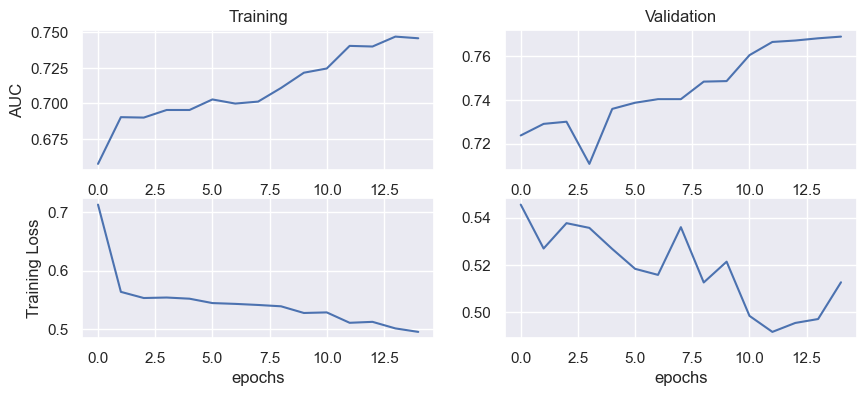

Fold 2 - Loss: 0.530776858329773 AUC: 0.7376679182052612


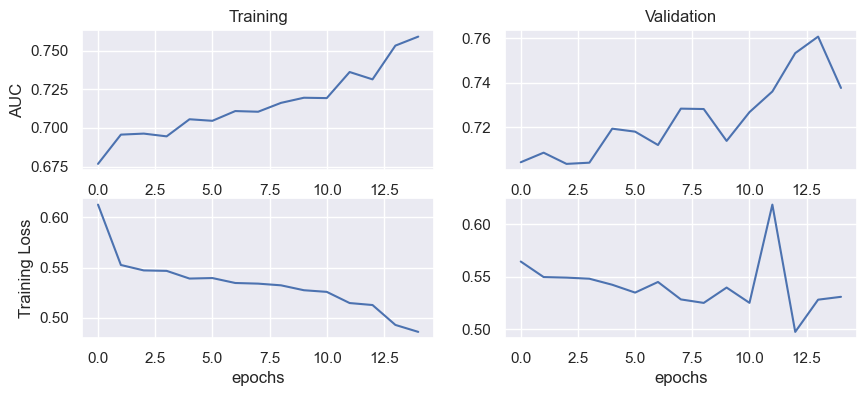

Fold 3 - Loss: 0.5238981246948242 AUC: 0.7551361918449402


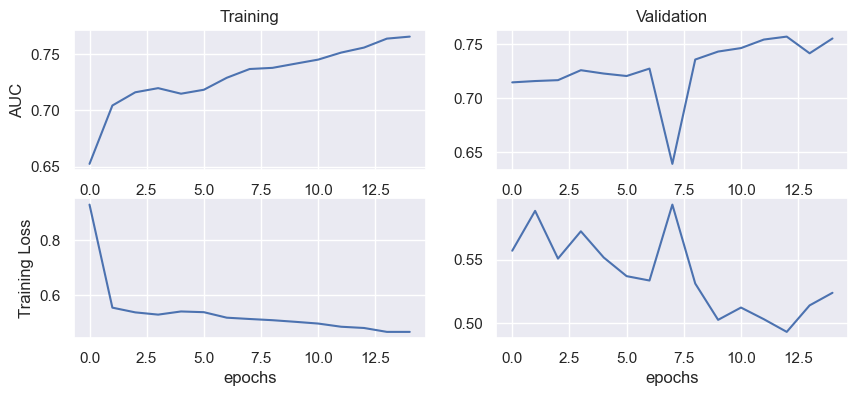

Fold 4 - Loss: 0.5247343182563782 AUC: 0.7423379421234131


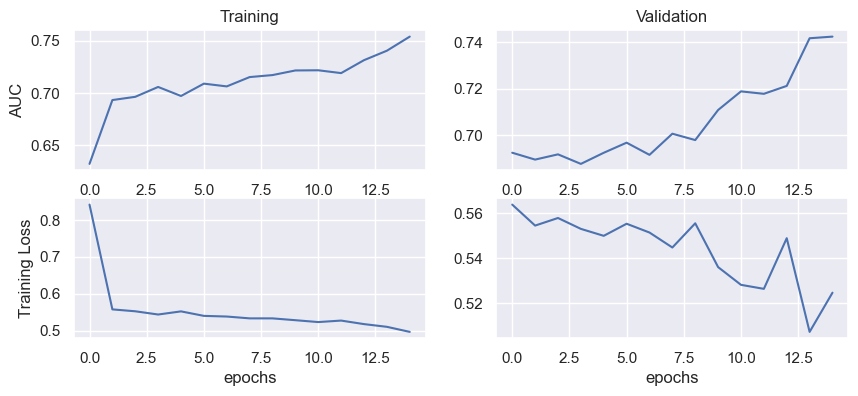

Fold 5 - Loss: 0.5920178890228271 AUC: 0.7560245394706726


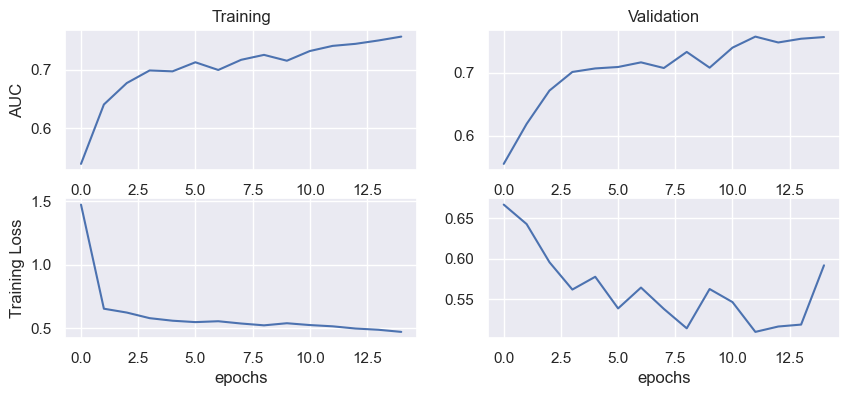

MLP
Average loss: 0.5368258714675903
Average AUC: 0.7520521998405456


In [21]:
#3 layer mlp

fold_count=1
auc_average4=0
loss_average4=0

#loop through each fold
for train_idx, test_idx in skfold.split(X, y):
    
    #get train and test sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx].to_numpy(), y.iloc[test_idx].to_numpy()
 
    mlp_input = Input(shape=(X_train.shape[1],), name='input')
    x = Dense(units=50, activation='relu')(mlp_input)
    x = Dense(units=25, activation='relu')(x)
    x = Dense(units=10, activation='relu')(x)
    x = Dense(units=5, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=mlp_input, outputs=predictions)
    
    model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=[tf.keras.metrics.AUC()])
    
    history = model.fit(X_train,
                         y_train,
                         epochs=15,
                         batch_size=32,
                         verbose=0,
                         validation_data=(X_test,y_test))
    
    loss, auc_score = model.evaluate(X_test, y_test, verbose=0)
    
    print(f'Fold {fold_count} - Loss: {loss} AUC: {auc_score}')
    fold_count+=1
    auc_average4+=auc_score
    loss_average4+=loss
    
    %matplotlib inline
    
    plt.figure(figsize=(10,4))
    plt.subplot(2,2,1)
    plt.plot(history.history['auc_'+str(auc_count)])
    
    plt.ylabel('AUC')
    plt.title('Training')
    plt.subplot(2,2,2)
    plt.plot(history.history['val_auc_'+str(auc_count)])
    plt.title('Validation')

    plt.subplot(2,2,3)
    plt.plot(history.history['loss'])
    plt.ylabel('Training Loss')
    plt.xlabel('epochs')
    
    plt.subplot(2,2,4)
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs')
    plt.show()
    
    auc_count+=1
    
print('MLP')
print(f'Average loss: {loss_average4/5}')
print(f'Average AUC: {auc_average4/5}')

After running the receiver operating characteristic and area under the curve for both the wide and deep network and MLP, we can see some major differences in the results. The MLP model has better trends for the AUC and loss as there are more epochs. The MLP model also has a higher average AUC value and an average loss closer to 0 as compared to the wide and deep network.

# $3.$ Exceptional Work